##Sample Image Test

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/test-image-Jebs.jpg')

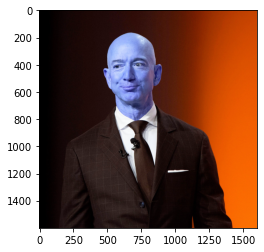

In [ ]:
plt.imshow(test_img);

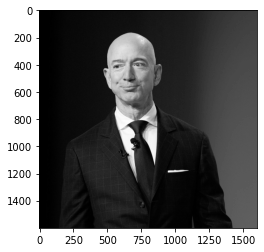

In [ ]:
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

In [ ]:
def Readimg(image_path):
  img = cv2.imread(image_path)
  return img
  


## Face and Eye Detection

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/data/haarcascades/haarcascade_eye.xml')

In [ ]:
def detect_FaceAnd_Eyes(img):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    (x,y,w,h) = faces[0]
    cv2.destroyAllWindows()
    for (x,y,w,h) in faces:
          face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
          roi_gray = gray[y:y+h, x:x+w]
          roi_color = face_img[y:y+h, x:x+w]
          eyes = eye_cascade.detectMultiScale(roi_gray)
          for (ex,ey,ew,eh) in eyes:
              cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
    plt.figure()
    plt.imshow(face_img, cmap='gray')
    plt.show()

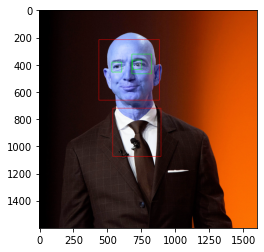

In [ ]:
# read the image
read_img = Readimg('/content/drive/MyDrive/test-image-Jebs.jpg')
# detect Face and eyes
detect_FaceAnd_Eyes(img=read_img)

## Get Cropped Image

In [ ]:
import shutil, sys, os, dlib, glob


In [ ]:

def get_cropped_image_if_2_eyes(image_path):
  try:
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.03, 5)
  except:
    faces = ()
  for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color



In [ ]:
get_corped_img = get_cropped_image_if_2_eyes('/content/drive/MyDrive/test-image-Jebs.jpg')

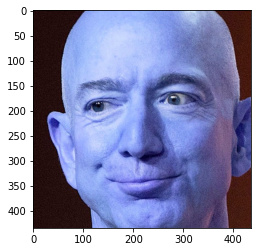

In [ ]:
plt.imshow(get_corped_img)

## Playing_with_path

In [ ]:
path_to_data = '/content/drive/MyDrive/Datasets/'
path_to_cr_data = '/content/drive/MyDrive/Datasets/cropped/'
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/Datasets/jeff bezos',
 '/content/drive/MyDrive/Datasets/Elon musk ']

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

jeff bezos
Generating cropped images in folder:  /content/drive/MyDrive/Datasets/cropped/jeff bezos
Elon musk 
Generating cropped images in folder:  /content/drive/MyDrive/Datasets/cropped/Elon musk 


## WaveLet Transform

In [66]:
import pywt


In [67]:
def Wave_let_transform(img,mode='haar',level=1):
  ImgArr = img
  ImgArr = cv2.cvtColor(ImgArr,cv2.COLOR_BGR2GRAY)
  # covert to float
  ImgArr = np.float32(ImgArr)
  # standardize
  ImgArr /= 255
  # compute coefficiets
  coeffs = pywt.wavedec2(ImgArr,mode,level=level)
  # process coumputation
  coeffs_H = list(coeffs)
  coeffs_H[0]*=0;
  #reconstruction
  ImgArr_H = pywt.waverec2(coeffs_H,mode)
  ImgArr_H *= 255;
  ImgArr_H = np.uint8(ImgArr_H)
  return ImgArr_H



In [68]:
demo = Wave_let_transform(get_corped_img,'db1',5)

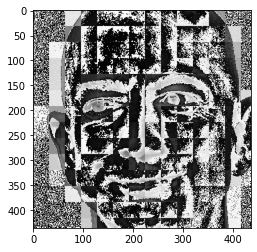

In [69]:
plt.imshow(demo,cmap = 'gray')

In [70]:
celebrity_file_names_dict

{'jeff bezos': ['/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos1.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos2.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos3.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos4.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos5.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos6.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos7.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos8.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos9.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos10.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos11.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos12.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos13.png',
  '/content/drive/MyDrive/Datasets/cropped/jef

In [71]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'jeff bezos': ['/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos1.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos2.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos3.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos5.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos6.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos7.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos8.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos9.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos10.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos12.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos13.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos14.png',
  '/content/drive/MyDrive/Datasets/cropped/jeff bezos/jeff bezos15.png',
  '/content/drive/MyDrive/Datasets/cropped/je

In [72]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'jeff bezos': 0, 'Elon musk ': 1}

## Machine Learning

In [73]:
X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
  
  for training_image in training_files:
    try:
      img = cv2.imread(training_image)
    except:
      break
    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = Wave_let_transform(img,'db1',5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    X.append(combined_img)
    y.append(class_dict[celebrity_name]) 


In [74]:
len(X[0])

4096

In [75]:
len(y)

115

In [76]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(115, 4096)

In [77]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9310344827586207

In [79]:
len(X_test)

29

In [80]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [81]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [82]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.732680,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.685621,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.709150,{'logisticregression__C': 5}


In [83]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [84]:
best_estimators['svm'].score(X_test,y_test)

0.896551724137931

In [85]:
best_estimators['random_forest'].score(X_test,y_test)

0.7241379310344828

In [86]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8620689655172413

In [87]:
best_clf = best_estimators['svm']

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  1],
       [ 2, 17]])

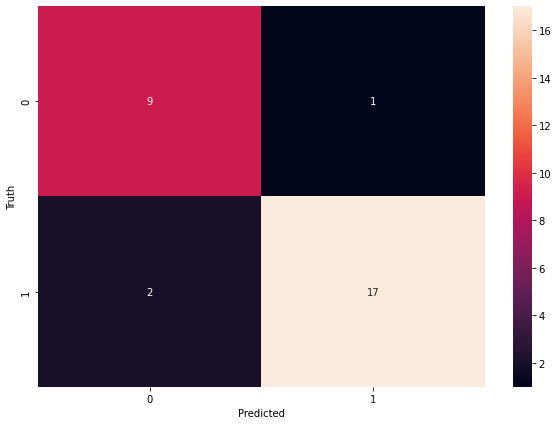

In [96]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [90]:
class_dict

{'jeff bezos': 0, 'Elon musk ': 1}

In [91]:
best_clf.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0])

In [92]:
np.array(y_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0])

In [93]:
best_clf.predict_proba(X_test)

array([[0.81974327, 0.18025673],
       [0.18324041, 0.81675959],
       [0.06285853, 0.93714147],
       [0.67163988, 0.32836012],
       [0.91391748, 0.08608252],
       [0.09480584, 0.90519416],
       [0.06938831, 0.93061169],
       [0.11898243, 0.88101757],
       [0.33315654, 0.66684346],
       [0.14984831, 0.85015169],
       [0.35383197, 0.64616803],
       [0.78408956, 0.21591044],
       [0.4525201 , 0.5474799 ],
       [0.53535576, 0.46464424],
       [0.20414229, 0.79585771],
       [0.17326596, 0.82673404],
       [0.81700455, 0.18299545],
       [0.18568857, 0.81431143],
       [0.40463661, 0.59536339],
       [0.16357144, 0.83642856],
       [0.5       , 0.5       ],
       [0.8311727 , 0.1688273 ],
       [0.86046347, 0.13953653],
       [0.57352359, 0.42647641],
       [0.13935678, 0.86064322],
       [0.21071912, 0.78928088],
       [0.05148937, 0.94851063],
       [0.04180407, 0.95819593],
       [0.84112449, 0.15887551]])

In [94]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['saved_model.pkl']

In [95]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))